## <center >K-means implementation</center>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

/home/kevin/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/kevin/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


<center>Chargement des données<center>


In [2]:
fromages_data = pd.read_csv("fromages.txt", sep="\t")

In [3]:
column_names =["calories", "sodium", "calcium", "lipides", "retinol", "folates", "proteines", "cholesterol", "magnesium"]

In [4]:
data = fromages_data[column_names].values.tolist() #Convertir en liste de listes

In [5]:
fromages_data.head(2)

,Fromages,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
0,CarredelEst,314,353.5,72.6,26.3,51.6,30.3,21.0,70,20
1,Babybel,314,238.0,209.8,25.1,63.7,6.4,22.6,70,27


<center>Calculer l’écart-type des 9 variables. Que pouvez-vous en conclure ?<center>

In [6]:
column_names = ["calories", "sodium", "calcium", "lipides", "retinol", "folates", "proteines", "cholesterol", "magnesium"]

In [7]:
std_array = list()
for column in column_names:
    std_array.append(fromages_data[column].std())

In [8]:
print(std_array)

[91.91435561691604, 108.67892332179333, 72.52888230541615, 8.129642288799818, 24.163097805672653, 11.72333889627214, 6.959787735283099, 28.24575472701202, 11.318388194882223]


In [9]:
""" 
Conclusion:  les ecart-types élévés indiquent une tres grande variabilité des données pour 
la variable courante tandis que un écart-type peu élévé inqidue une concentration des données 
autour de la moyenne.
"""

' \nConclusion:  les ecart-types élévés indiquent une tres grande variabilité des données pour \nla variable courante tandis que un écart-type peu élévé inqidue une concentration des données \nautour de la moyenne.\n'

In [10]:
def manhattan_distance(point_A, point_B):
    if (len(point_A) != len(point_B)) :
        raise ValueError("Les deux vecteurs ne sont pas de meme taille...")
    distance = 0
    for i in range(len(point_A)):
        distance = distance + np.abs(point_A[i] - point_B[i])
    return distance

In [11]:
point_A, point_B = [2], [5]
print(manhattan_distance(point_A, point_B))

3


<center>Calcul du centre<center>

In [12]:
def compute_center(set_points):

    if not set_points or not all(isinstance(point, list) for point in set_points) :
        raise ValueError("La liste doit contenir des liste...")
    
    length = len(set_points[0])

    if any(len(point) != length for point in set_points) :
        raise ValueError("Toutes les sous listes doivent avoir la meme taille...")
    
    center = []
    value = 0
    size = len(set_points)

    for j in range(length):  
        value = sum(point[j] for point in set_points) / size
        center.append(value) 
    return center

In [13]:
point_A = [1, 5, 8]
point_B = [8, 5, 4]
set_points = [point_A, point_B]

print(compute_center(set_points))

[4.5, 5.0, 6.0]


<center>assigner les points aux differents clusters</center>

In [14]:
def assign_clusters(data, centroids):  
    clusters = []  
    for point in data:  
        distances = [manhattan_distance(point, centroid) for centroid in centroids]  
        cluster = distances.index(min(distances))  
        clusters.append(cluster)  
    return clusters  

<center>Calcul de l'inertie intra-cluster<center>

In [15]:
def compute_inertia(data, labels, centroids):  
    inertia = 0.0  
    for i, centroid in enumerate(centroids):  
        cluster_points = [data[j] for j in range(len(data)) if labels[j] == i]  
        inertia += sum(manhattan_distance(point, centroid) ** 2 for point in cluster_points)  
    return inertia 

<center>Implémentation de la fonction k-means </center>

In [16]:
def kmeans(data, k, max_iters=100, tol=0.1):  
    # Initialiser les centroids aléatoirement  
    np.random.seed(0)  
    random_indices = np.random.choice(len(data), size=k, replace=False)  
    centroids = [data[i] for i in random_indices]  
    
    inertia = None  

    for iteration in range(max_iters):  
        # Étape 1: Affectation des clusters  
        labels = assign_clusters(data, centroids)  
        
        # Étape 2: Calcul des centroids  
        new_centroids = []  
        for i in range(k):  
            cluster_points = [data[j] for j in range(len(data)) if labels[j] == i]  
            new_centroid = compute_center(cluster_points)  
            new_centroids.append(new_centroid)  
        
        # Étape 3: Calculer l'inertie intra-cluster  
        new_inertia = compute_inertia(data, labels, new_centroids)  
        
        # Condition d'arrêt  
        if inertia is not None and abs(inertia - new_inertia) < tol:  
            print(f"Convergence atteinte après {iteration} itérations.")  
            break  
        
        inertia = new_inertia  
        centroids = new_centroids  
        #Groupage des données dans chaque cluster
        clusters = {i: [] for i in range(k)}  
        for index, label in enumerate(labels):  
            clusters[label].append(fromages_data.iloc[index, 0])
            """
              fromages_data.iloc[idx, 0] accède à la première
              colonne (0 index) de votre DataFrame fromages_data,
              qui contient généralement 
              les noms des fromages (ou autres informations).
            """  
    print(f"Inertie: {inertia}")
    return clusters, labels, centroids  

In [17]:
def plot_clusters(data, labels, centroids):  
    plt.figure(figsize=(10, 6))  
    
    # Créer un DataFrame uniquement avec les colonnes "calories" et "sodium"  
    df_data = pd.DataFrame(data, columns=column_names)  # Créez d'abord un DataFrame avec toutes les colonnes  
    df_data_2D = df_data[["calories", "sodium"]]  # Sélectionnez uniquement les colonnes souhaitées pour la visualisation  
    
    # Tracer les points et les centroids  
    plt.scatter(df_data_2D["calories"], df_data_2D["sodium"], c=labels, cmap='viridis', marker='o', label='Data Points')  
    centroids_df = pd.DataFrame(centroids, columns=column_names)  # Créez également un DataFrame des centroids  
    centroids_2D = centroids_df[["calories", "sodium"]]  # Sélectionnez uniquement les colonnes souhaitées pour la visualisation  
    
    plt.scatter(centroids_2D["calories"], centroids_2D["sodium"], c='red', marker='X', s=200, label='Centroids')  
    plt.title('K-means Clustering of Cheeses')  
    plt.xlabel('Calories')  
    plt.ylabel('Sodium')  
    plt.legend()  
    plt.show()  

Convergence atteinte après 3 itérations.
Inertie: 939577.1246222222
Clusters:
 {0: ['Beaufort', 'Cantal', 'Cheddar', 'Comte', 'Edam', 'Emmental', 'Parmesan', 'SaintPaulin', 'Vacherin'], 1: ['Fr.chevrepatemolle', 'Fr.frais20nat.', 'Fr.frais40nat.', 'Petitsuisse40', 'Yaourtlaitent.nat.'], 2: ['CarredelEst', 'Babybel', 'Bleu', 'Camembert', 'Chabichou', 'Chaource', 'Coulomniers', 'Fr.fondu.45', 'Maroilles', 'Morbier', 'PontlEveque', 'Pyrenees', 'Reblochon', 'Rocquefort', 'Tome']}
Labels:
 [2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 1, 2, 1, 1, 2, 2, 0, 1, 2, 2, 2, 2, 0, 2, 0, 1]
Centroids:
 [[364.22222222222223, 158.33333333333334, 257.8, 29.022222222222222, 61.955555555555556, 4.066666666666666, 26.16666666666667, 95.55555555555556, 37.888888888888886], [122.6, 67.8, 121.55999999999999, 8.72, 74.22, 19.380000000000003, 7.9799999999999995, 24.6, 12.2], [320.6666666666667, 288.56666666666666, 163.88666666666668, 26.386666666666667, 68.70666666666668, 16.253333333333334, 20.633333333333333, 78.6

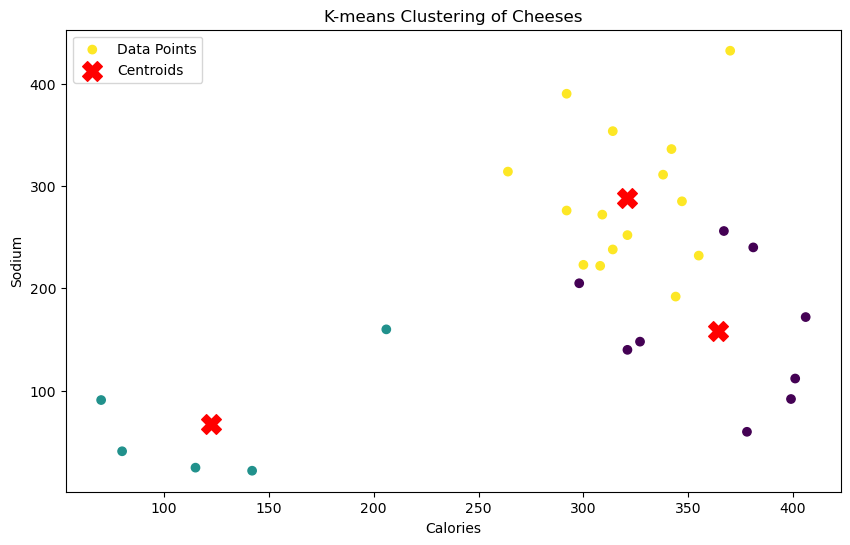

In [18]:
if __name__ == "__main__":  
    k = 3  # Nombre de clusters souhaité  
    clusters, labels, centroids = kmeans(data, k)  

    print("Clusters:\n", clusters)  
    print("Labels:\n", labels)  
    print("Centroids:\n", centroids)

      # Visualiser les clusters et les centroids  
    plot_clusters(data, labels, centroids)
